# **Week 5 Readings**

_John Andrew Dixon_

---

**Setup**

In [19]:
# Import necessary Python modules
import pandas as pd

In [20]:
# Load data and verify
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSdSJuFHcoz8G3NZPlYpavtY8IjFJDczqqEukadW_rEfumnbd5kpF9H0e9vS9kxrnglCYiwLJy4_PXK/pub?output=csv"
df = pd.read_csv(url)
df['Outlet_Size'].fillna('Small', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


---

## **Stating the Supervised Machine Learning Problem**

In [21]:
# Creates the Features Matrix AKA 2D grid where rows are samples 
# and columns are features. This makes chooses the columns 
# `Outlet_Size`, `Outlet_Location_Type`, and `Outlet_Type` as the
# features of the Features Matrix. All rows are chosen as the 
# samples.
features = list(df.columns)[8:-1]
X = df.loc[:, features]
X

,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Medium,Tier 1,Supermarket Type1
1,Medium,Tier 3,Supermarket Type2
2,Medium,Tier 1,Supermarket Type1
3,Small,Tier 3,Grocery Store
4,High,Tier 3,Supermarket Type1
...,...,...,...
8518,High,Tier 3,Supermarket Type1
8519,Small,Tier 2,Supermarket Type1
8520,Small,Tier 2,Supermarket Type1
8521,Medium,Tier 3,Supermarket Type2


In [22]:
# Creates the Target Vector AKA a 1D column where rows are samples 
# and the column is what you wish to predict. Below makes the 
# `Item_Outlet_Sales` as the the columns to predict. 
# All rows are chosen as the samples.
y = df["Item_Outlet_Sales"]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## **Train Test Split (Model Validation)**

Brief explanation:
1. Split a dataset into two sets: training set (default 75%), testing set (default 25%).
2. Train with the training set only.
3. Test with the testing set only. This is to simulate how well it'll do with new data.

A note on Data Leakage:
- It happens when any data from the testing set is used to train the model.
- DO NOT ALLOW THIS TO HAPPEN! Training _**only**_ with data from the training set.

Here's how to implement it:

In [23]:
# Import the TTS from sklearn
from sklearn.model_selection import train_test_split

# Perform the TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Output the lengths to see if they tach
print(len(X_train), len(y_train), len(X_test), len(y_test))

6392 6392 2131 2131


## **Types of Features**

There are three types of features:
1. Numeric Features
    - Int or Float
    - Ex: Price, mpg, IQ
2. Ordinal Features
    - Int or Strings
    - Ex: Star ratings, Grades
3. Categorical (Nominal) Features
    - Int or Strings
    - Ex: Color, Car model

All must be transformed into a number to be used in Machine Learning.

### **Transforming Numeric Features**

These are already numeric but they may need to be scaled in someway.

### **Transforming Ordinal Features**

These type of features would need to be mapped to a numerical value.

In [27]:
# Replacement dictionary to transform ordinal to numerical
sizes = {
    'Small': 0,
    'Medium': 1,
    'High': 2
}

# Replace the ordinal features with numerical values
X_train['Outlet_Size'] = X_train['Outlet_Size'].replace(sizes)
X_test['Outlet_Size'] = X_test['Outlet_Size'].replace(sizes)

### **Transforming Categorical (Nominal) Features**

Transforming a Categorical feature into a numerical value cannot be done in the same way as an Ordinal feature. This is because machine learning algorithms will interpret higher numbers as greater which should not be done with categorical values. To handle this, categorical features can be transformed through one-hot encoding, as shown below.

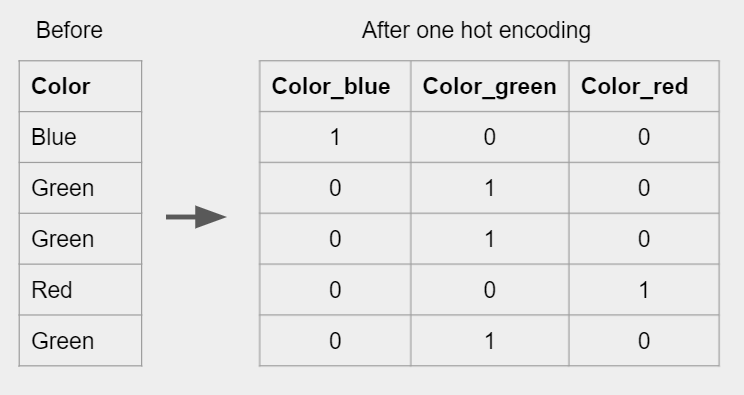

This doesn't need to be done manually. A future lesson will teach an easier way of doing this.

## **Standardization and Scaling Data**

### **Scale**
Means to change the range of values. This does not change the distribution.

### **Standardize**
This is a kind scaling. It means to scale the values so the distribution has a standard deviation of one and a mean of 0. This closely resembles a normal distribution. Units are lost here.